C:\Users\ching\AppData\Local\Temp\ipykernel_39976\3783434397.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(rmse_values, labels=combination_names, patch_artist=True,


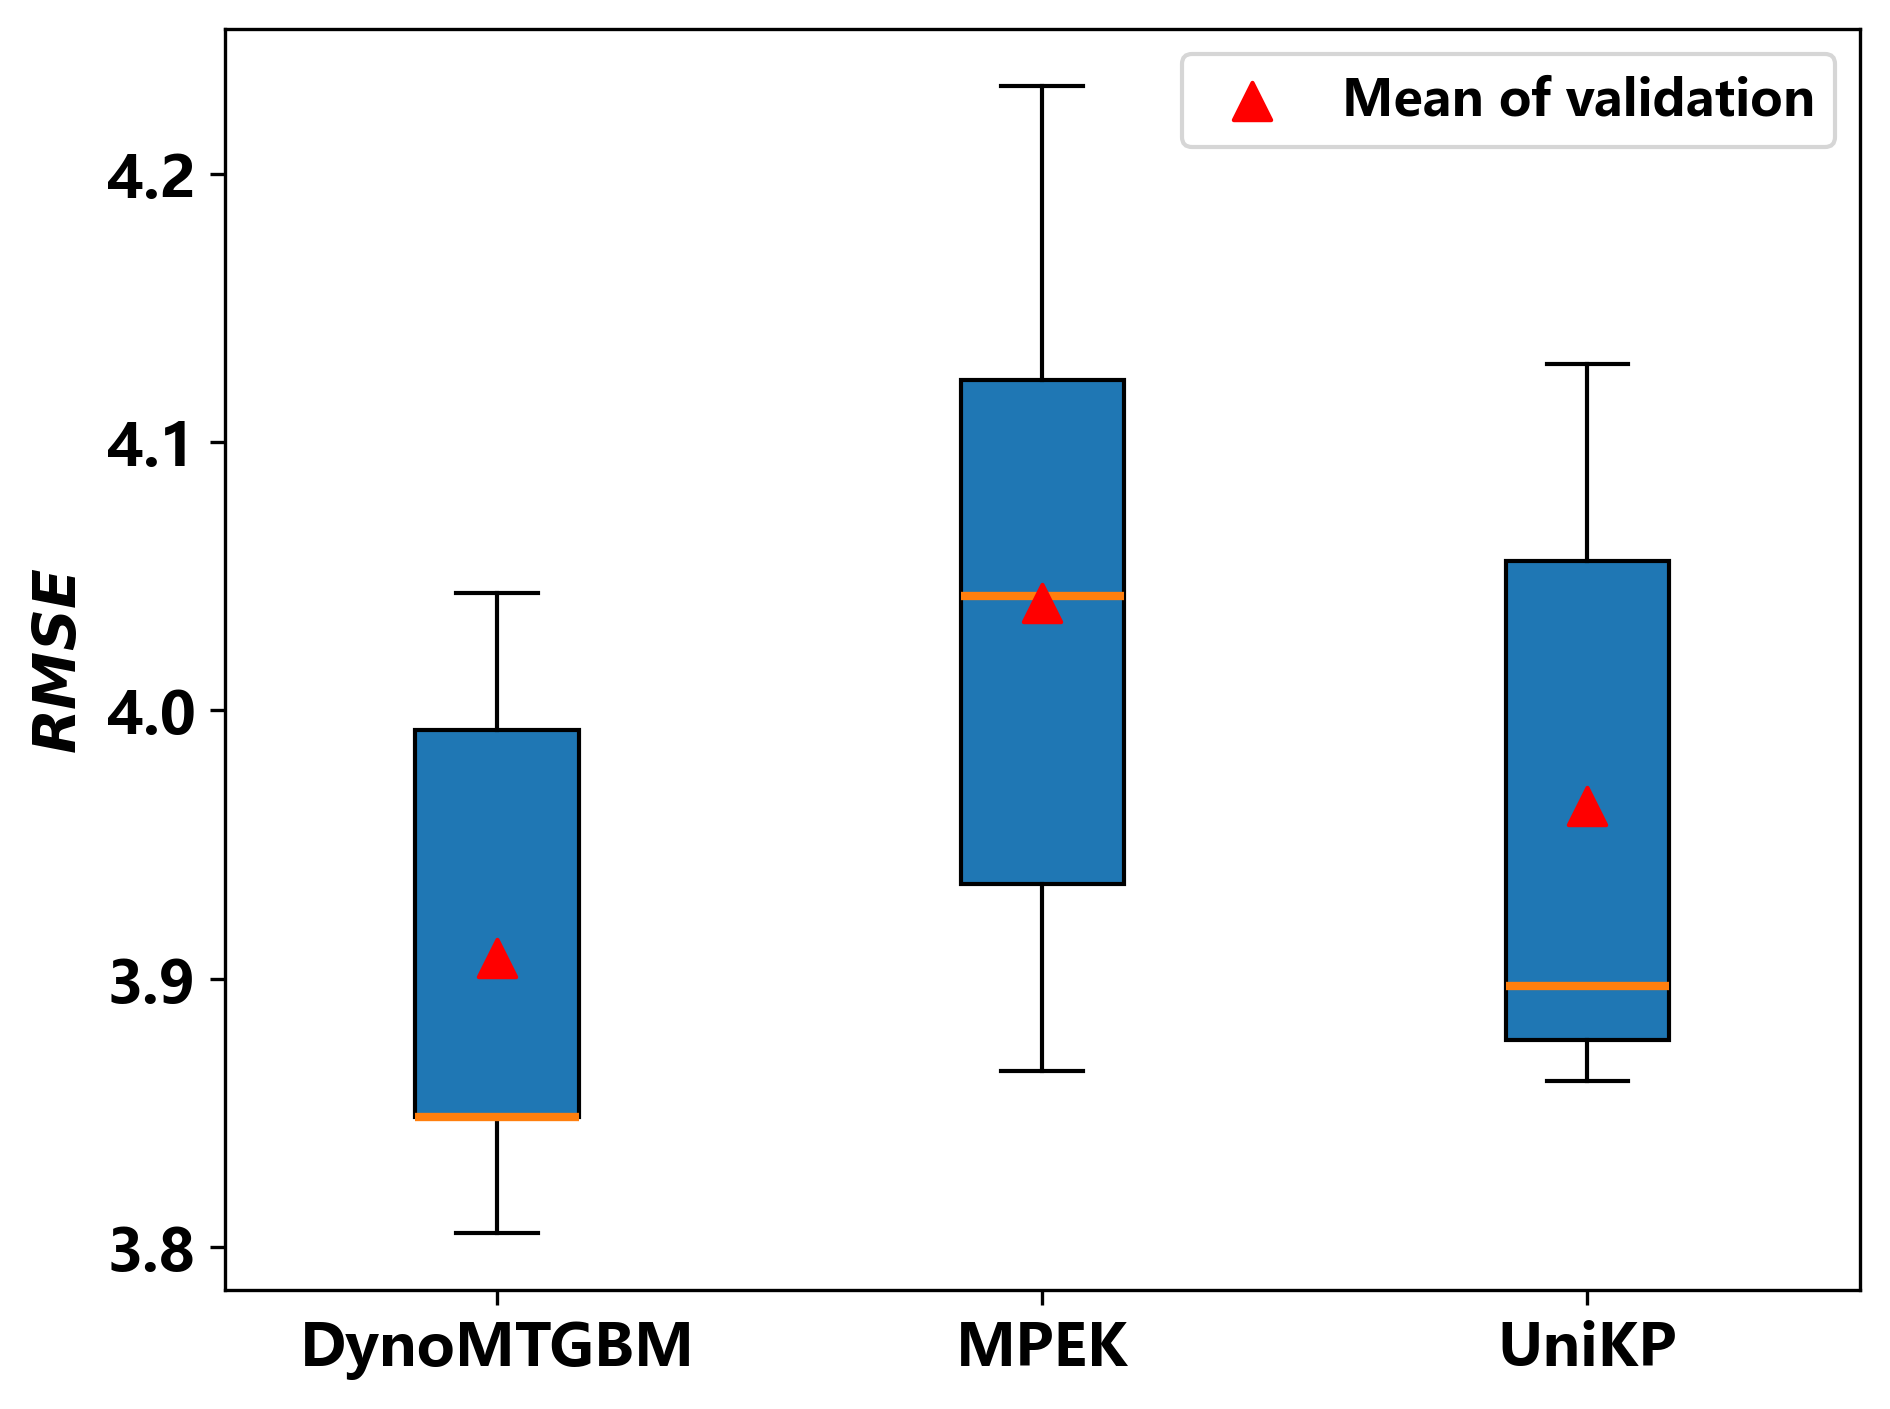

C:\Users\ching\AppData\Local\Temp\ipykernel_39976\3783434397.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(r2_values, labels=combination_names, patch_artist=True,


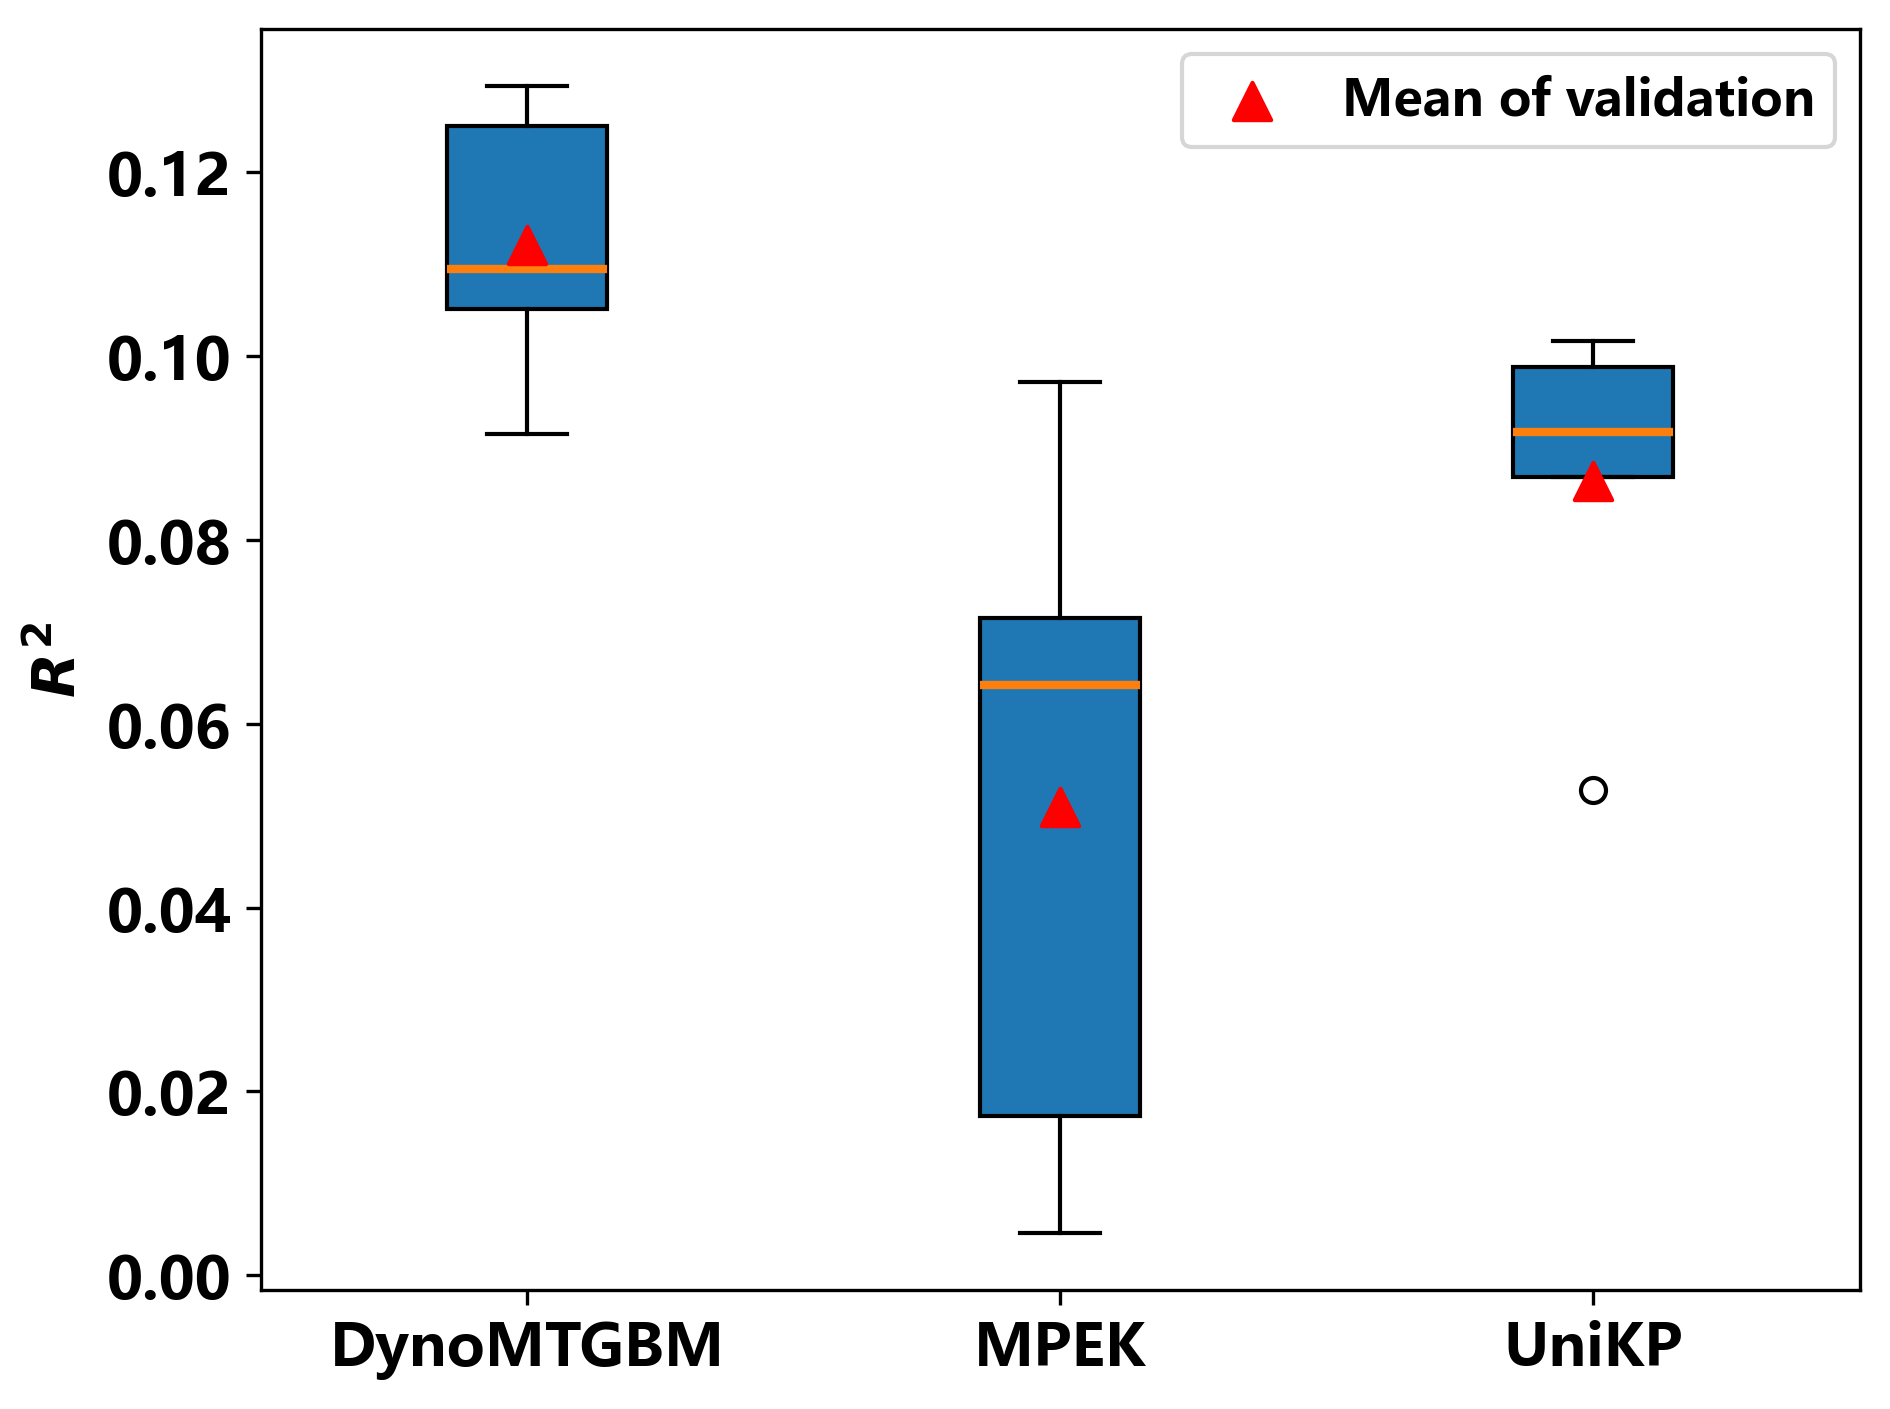

C:\Users\ching\AppData\Local\Temp\ipykernel_39976\3783434397.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(pcc_values, labels=combination_names, patch_artist=True,


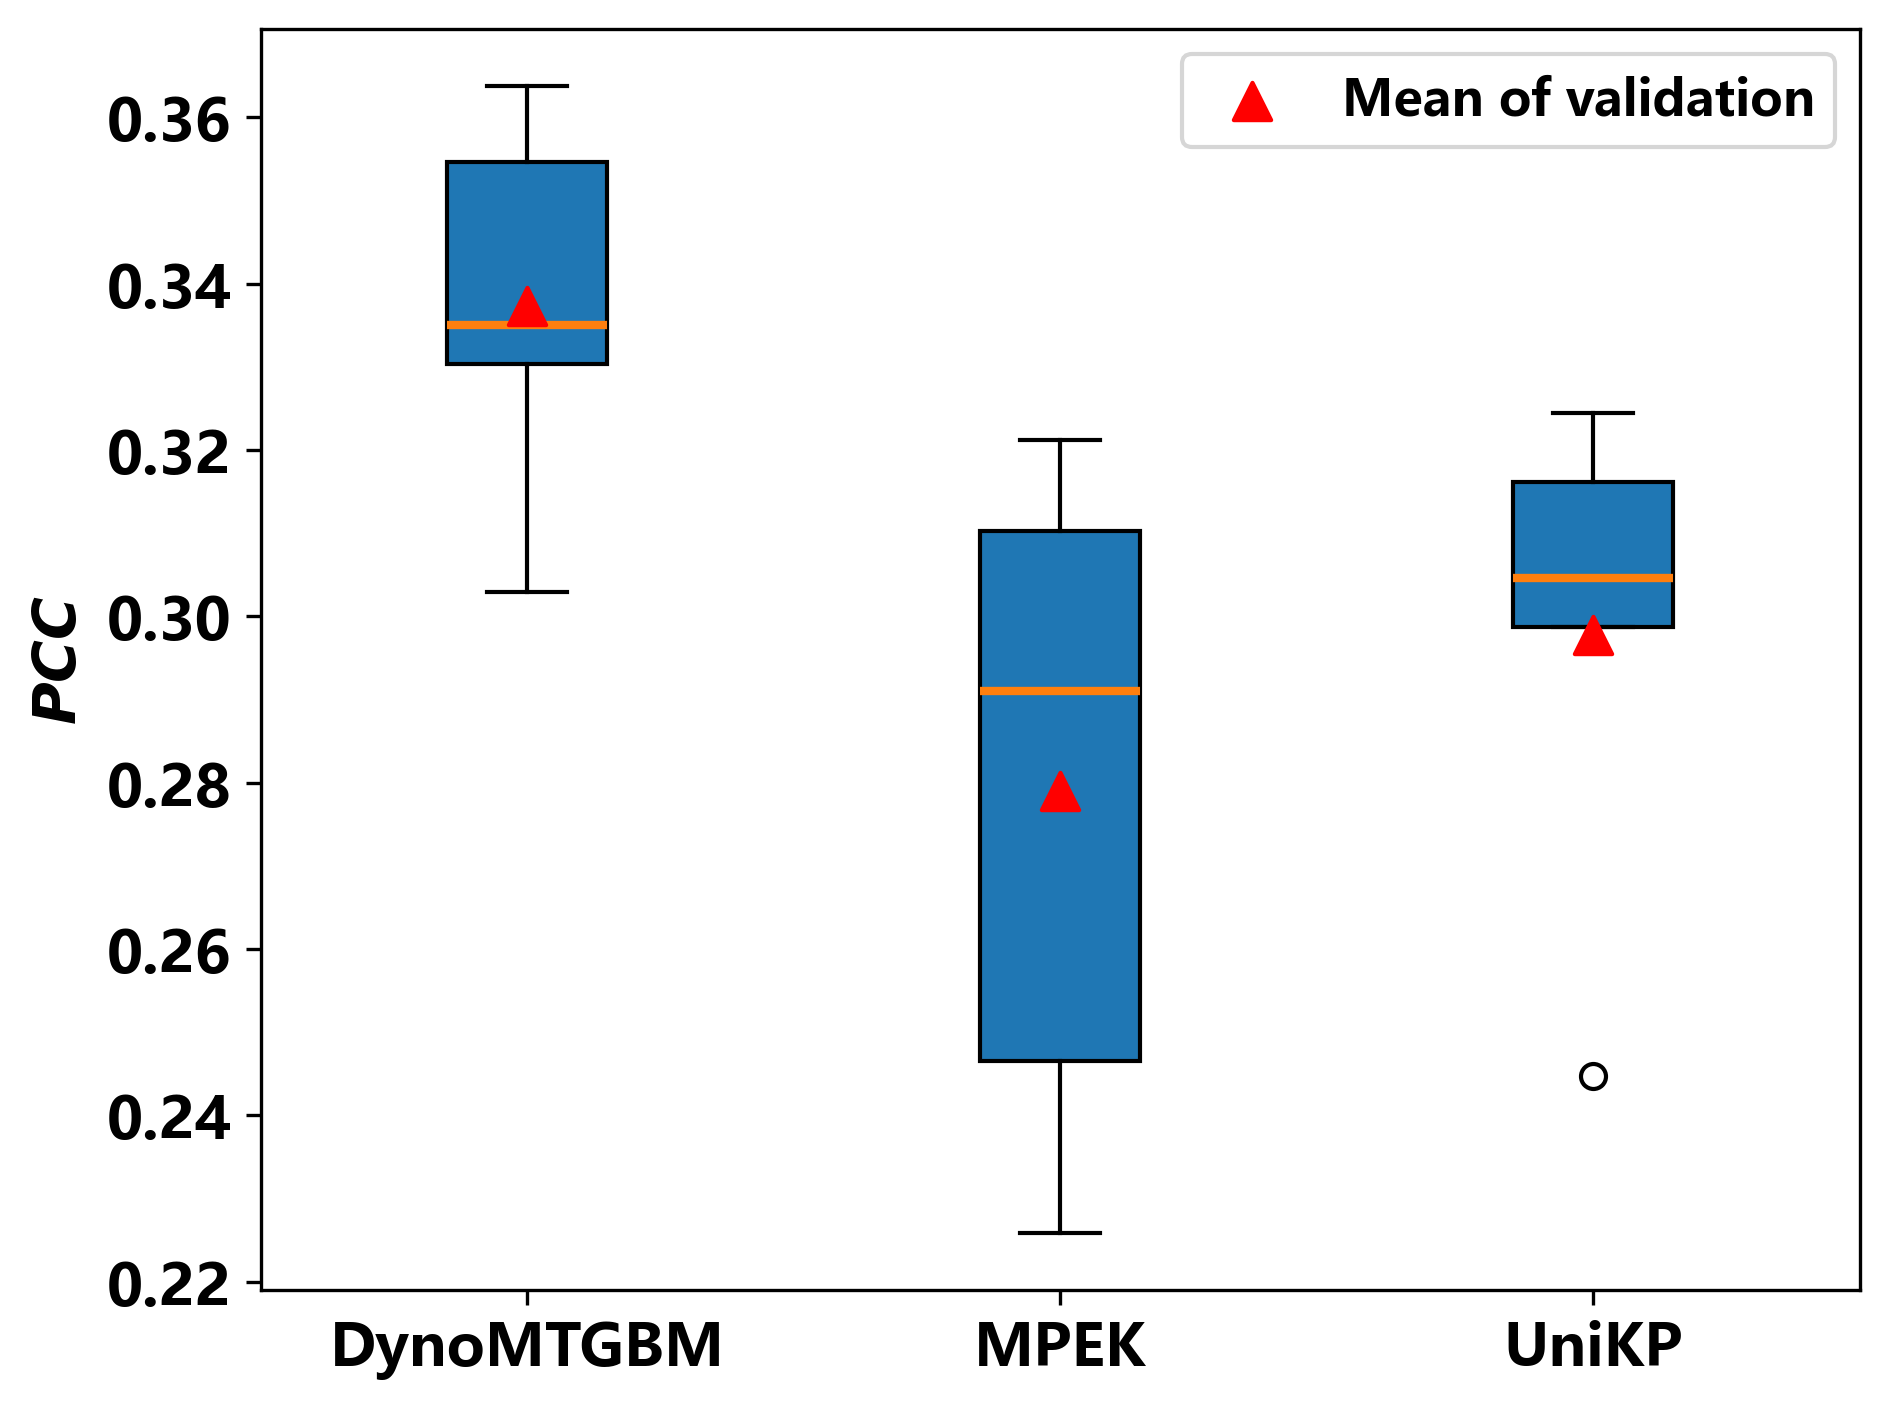

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
import matplotlib
matplotlib.rc("font",family='MicroSoft YaHei',weight="bold")
import os
current_dir = os.getcwd()

df_cv_results = pd.read_excel(f"{current_dir}/cv_results.xlsx")
grouped = df_cv_results.groupby("Model")
combination_names = list(grouped.groups.keys())
# combination_names = [name.replace("unirep", "UniRep").replace("molebert", "MoleBERT").replace("transsmiles", "TransSmiles").replace("esmc", "ESMC").replace("prott5", "ProtT5").replace("prost5", "ProstT5").replace("esm2", "ESM2") for name in combination_names]

rmse_values = [group["Val_RMSE"].values for _, group in grouped]
r2_values = [group["Val_R2"].values for _, group in grouped]
pcc_values = [group["Val_PCC"].values for _, group in grouped]

val_rmse_values_mean = [np.mean(vals) for vals in rmse_values]
val_r2_values_mean = [np.mean(vals) for vals in r2_values]
val_pcc_values_mean = [np.mean(vals) for vals in pcc_values]

# RMSE
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
plt.boxplot(rmse_values, labels=combination_names, patch_artist=True,
            medianprops=dict(linewidth=2))  # 调大中位线的宽度
plt.scatter(range(1, len(combination_names) + 1), val_rmse_values_mean,
            c='red', marker='^', s=80, linewidths=1, zorder=3, label="Mean of validation")  # 调大散点的大小
plt.ylabel("$RMSE$", fontsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.tight_layout()
plt.grid(False)
plt.legend(loc="best", fontsize=12)
plt.savefig(f"{current_dir}/cdhit_val_rmse.png", dpi=300)
plt.show()


# R2
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
plt.boxplot(r2_values, labels=combination_names, patch_artist=True,
            medianprops=dict(linewidth=2))  # 调大中位线的宽度
plt.scatter(range(1, len(combination_names) + 1), val_r2_values_mean,
            c='red', marker='^', s=80, linewidths=1, zorder=3, label="Mean of validation")  # 调大散点的大小
plt.ylabel("$R^2$", fontsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.tight_layout()
plt.grid(False)
plt.legend(loc="best", fontsize=12)
plt.savefig(f"{current_dir}/cdhit_val_r2.png", dpi=300)
plt.show()

# PCC
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
plt.boxplot(pcc_values, labels=combination_names, patch_artist=True,
            medianprops=dict(linewidth=2))  # 调大中位线的宽度
plt.scatter(range(1, len(combination_names) + 1), val_pcc_values_mean,
            c='red', marker='^', s=80, linewidths=1, zorder=3, label="Mean of validation")  # 调大散点的大小
plt.ylabel("$PCC$", fontsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.tight_layout()
plt.grid(False)
plt.legend(loc="best", fontsize=12)
plt.savefig(f"{current_dir}/cdhit_val_pcc.png", dpi=300)
plt.show()
